In [1]:
# !python.exe -m pip install --upgrade pip
# !pip install kagglehub[pandas-datasets]
# !pip install pandas


In [2]:
import pandas as pd

In [3]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "amazon_sales_dataset.csv"

df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "aliiihussain/amazon-sales-dataset",
    file_path
)

print(df.head())


   order_id  order_date  product_id product_category   price  \
0         1  2022-04-13        2637            Books  128.75   
1         2  2023-03-12        2300          Fashion  302.60   
2         3  2022-09-28        3670           Sports  495.80   
3         4  2022-04-17        2522            Books  371.95   
4         5  2022-03-13        1717           Beauty  201.68   

   discount_percent  quantity_sold customer_region payment_method  rating  \
0                10              4   North America            UPI     3.5   
1                20              5            Asia    Credit Card     3.7   
2                20              2          Europe            UPI     4.4   
3                15              4     Middle East            UPI     5.0   
4                 0              4     Middle East            UPI     4.6   

   review_count  discounted_price  total_revenue  
0           443            115.88         463.52  
1           475            242.08        1210.40  

In [4]:
df = pd.DataFrame(df)

In [5]:
df.head()

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72


In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          50000 non-null  int64  
 1   order_date        50000 non-null  object 
 2   product_id        50000 non-null  int64  
 3   product_category  50000 non-null  object 
 4   price             50000 non-null  float64
 5   discount_percent  50000 non-null  int64  
 6   quantity_sold     50000 non-null  int64  
 7   customer_region   50000 non-null  object 
 8   payment_method    50000 non-null  object 
 9   rating            50000 non-null  float64
 10  review_count      50000 non-null  int64  
 11  discounted_price  50000 non-null  float64
 12  total_revenue     50000 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 5.0+ MB
None


In [7]:
print(df.columns)

Index(['order_id', 'order_date', 'product_id', 'product_category', 'price',
       'discount_percent', 'quantity_sold', 'customer_region',
       'payment_method', 'rating', 'review_count', 'discounted_price',
       'total_revenue'],
      dtype='object')


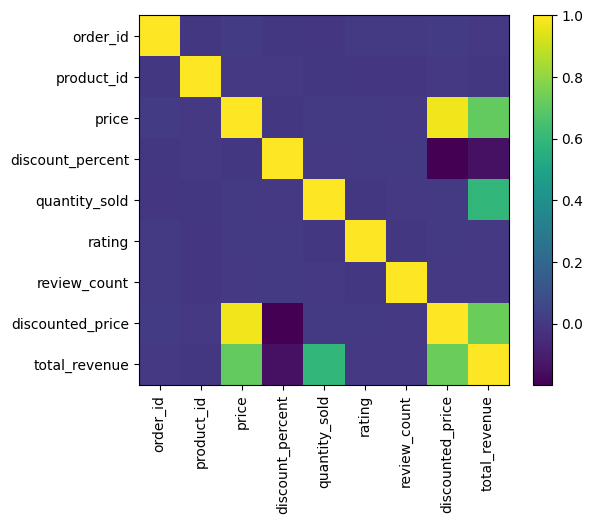

In [8]:
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)

plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


Target: total_revenue

price - strong positive correlation ->
price increases - revenue increases.

quantity_sold - strong positive correlation ->
quantity_sold increases - revenue increases.

discount_percent - negative correlation ->
discount_percent increases, final revenue decreases.

In [9]:
df = df.drop(columns=[
    "order_id",
    "product_id",
    "review_count",
    "discounted_price",
    "order_date",
    "rating",
    "payment_method",
    "customer_region",
    "product_category"
])

df.head()

,price,discount_percent,quantity_sold,total_revenue
0,128.75,10,4,463.52
1,302.60,20,5,1210.40
2,495.80,20,2,793.28
3,371.95,15,4,1264.64
4,201.68,0,4,806.72


In [10]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             50000 non-null  float64
 1   discount_percent  50000 non-null  int64  
 2   quantity_sold     50000 non-null  int64  
 3   total_revenue     50000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 1.5 MB


In [11]:
df.describe()

,price,discount_percent,quantity_sold,total_revenue
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,252.507260,13.340700,2.999400,657.331475
std,143.025544,9.850694,1.415401,526.223968
min,5.010000,0.000000,1.000000,3.840000
25%,127.840000,5.000000,2.000000,240.320000
50%,252.970000,10.000000,3.000000,505.410000
75%,376.335000,20.000000,4.000000,968.970000
max,499.990000,30.000000,5.000000,2499.550000


In [12]:
print(df.shape)

(50000, 4)


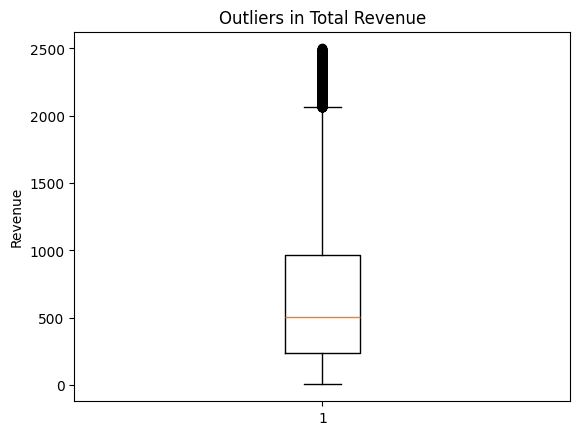

In [13]:
plt.figure()
plt.boxplot(df["total_revenue"])
plt.title("Outliers in Total Revenue")
plt.ylabel("Revenue")
plt.show()


In [14]:
Q1 = df["total_revenue"].quantile(0.25)
Q3 = df["total_revenue"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[
    (df["total_revenue"] >= lower_bound) &
    (df["total_revenue"] <= upper_bound)
]
df = df_clean

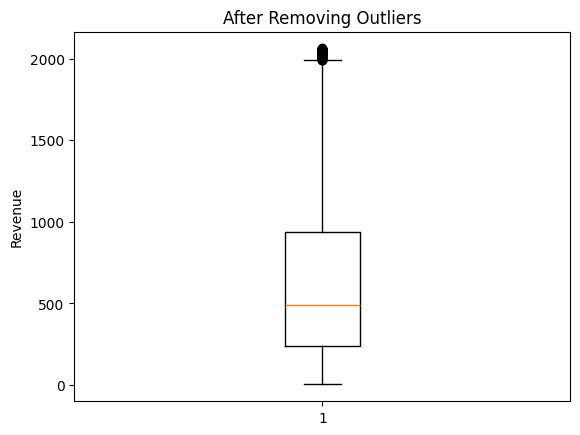

In [15]:
plt.figure()
plt.boxplot(df_clean["total_revenue"])
plt.title("After Removing Outliers")
plt.ylabel("Revenue")
plt.show()


In [16]:
Q1 = df["total_revenue"].quantile(0.25)
Q3 = df["total_revenue"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df[
    (df["total_revenue"] >= lower_bound) &
    (df["total_revenue"] <= upper_bound)
]
df = df_clean

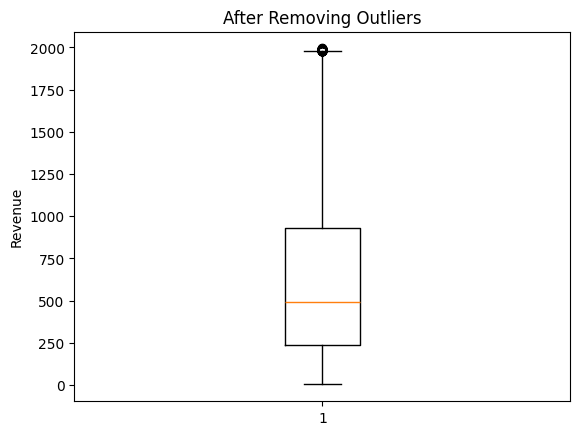

In [17]:
plt.figure()
plt.boxplot(df_clean["total_revenue"])
plt.title("After Removing Outliers")
plt.ylabel("Revenue")
plt.show()


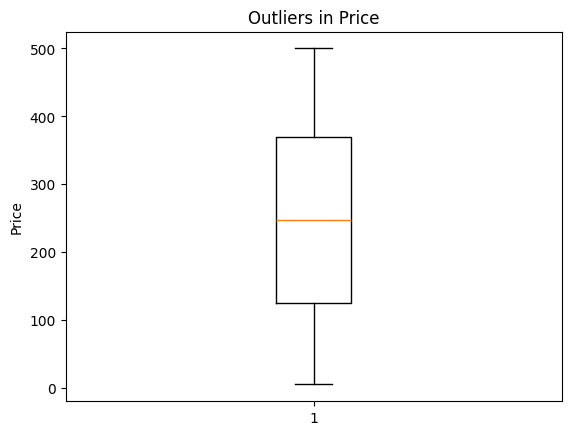

In [18]:
plt.figure()
plt.boxplot(df["price"])
plt.title("Outliers in Price")
plt.ylabel("Price")
plt.show()


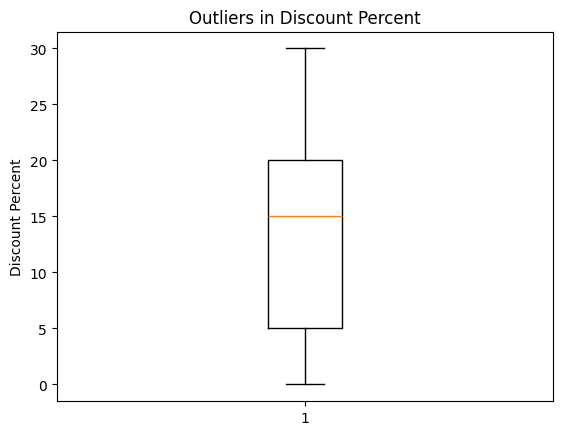

In [19]:
plt.figure()
plt.boxplot(df["discount_percent"])
plt.title("Outliers in Discount Percent")
plt.ylabel("Discount Percent")
plt.show()

In [20]:
print(df.shape)


(49031, 4)


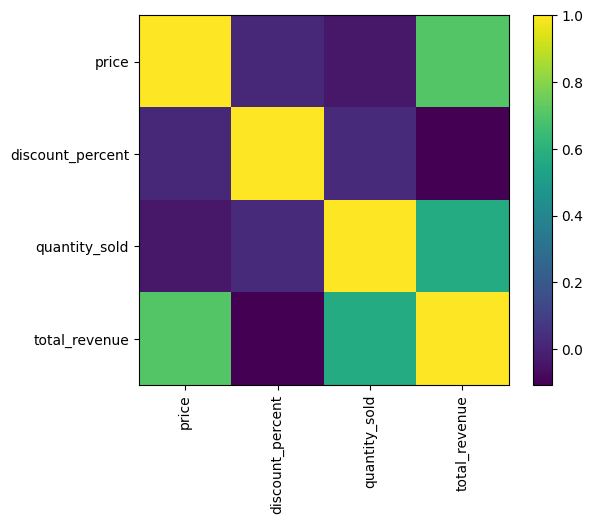

In [21]:
corr = df.corr(numeric_only=True)

plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


In [22]:
df.head()

,price,discount_percent,quantity_sold,total_revenue
0,128.75,10,4,463.52
1,302.60,20,5,1210.40
2,495.80,20,2,793.28
3,371.95,15,4,1264.64
4,201.68,0,4,806.72


In [23]:
df.describe()

,price,discount_percent,quantity_sold,total_revenue
count,49031.000000,49031.000000,49031.000000,49031.000000
mean,248.391131,13.497787,2.959903,627.327556
std,141.325030,9.856796,1.400862,485.390136
min,5.010000,0.000000,1.000000,3.840000
25%,125.630000,5.000000,2.000000,235.595000
50%,247.930000,15.000000,3.000000,489.880000
75%,369.560000,20.000000,4.000000,931.830000
max,499.990000,30.000000,5.000000,1993.400000


In [24]:
X = df.drop("total_revenue", axis=1)
y = df["total_revenue"]


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [27]:
y_pred = model.predict(X_test)


In [28]:
from sklearn.metrics import r2_score

print("R2 Score:", r2_score(y_test, y_pred))


R2 Score: 0.8718154420051291


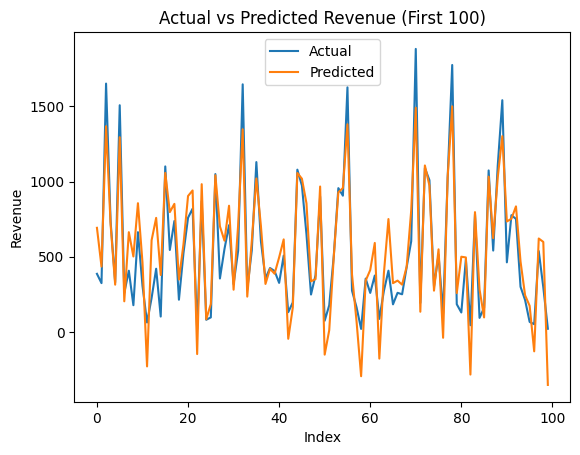

In [29]:
plt.figure()

plt.plot(y_test.values[:100], label="Actual")
plt.plot(y_pred[:100], label="Predicted")

plt.title("Actual vs Predicted Revenue (First 100)")
plt.xlabel("Index")
plt.ylabel("Revenue")

plt.legend()
plt.show()


In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline



In [31]:
model_poly = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("linear", LinearRegression())
])

In [32]:
model_poly.fit(X_train, y_train)

y_pred_poly = model_poly.predict(X_test)

print("Polynomial R2:", r2_score(y_test, y_pred_poly))

Polynomial R2: 0.9984241428196654


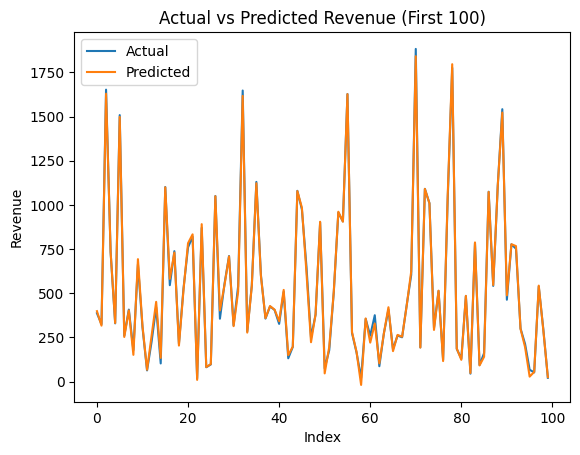

In [33]:
plt.figure()

plt.plot(y_test.values[:100], label="Actual")
plt.plot(y_pred_poly[:100], label="Predicted")

plt.title("Actual vs Predicted Revenue (First 100)")
plt.xlabel("Index")
plt.ylabel("Revenue")

plt.legend()
plt.show()

In [34]:
new_data = pd.DataFrame({
    "price": [250.0, 400.0, 150.0],
    "discount_percent": [10, 20, 5],
    "quantity_sold": [3, 5, 2],
})


In [35]:
new_data

,price,discount_percent,quantity_sold
0,250.0,10,3
1,400.0,20,5
2,150.0,5,2


In [36]:
predictions = model_poly.predict(new_data)

print("Predicted Revenue:")
for i, pred in enumerate(predictions):
    print(f"Data Point {i+1}: ${int(pred)}")

new_data["predicted_revenue"] = predictions.astype(int)


Predicted Revenue:
Data Point 1: $676
Data Point 2: $1616
Data Point 3: $278


In [37]:
new_data

,price,discount_percent,quantity_sold,predicted_revenue
0,250.0,10,3,676
1,400.0,20,5,1616
2,150.0,5,2,278


The code above loads the Amazon sales dataset, performs exploratory data analysis, cleans the data by removing outliers, and builds a polynomial regression model to predict total revenue based on price, discount percent, and quantity sold. Finally, it makes predictions on new data points and displays the predicted revenue.